In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_excel(r"C:\Users\admin\Downloads\Telegram Desktop\flight_price.xlsx")

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [9]:
df["Source"].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [10]:
df['Destination'].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [11]:
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [12]:
df[ 'Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

# Data Cleaning 

In [14]:
df2=df.copy()
df2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [15]:
df2['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [16]:
df2['Date_of_Journey']=df2['Date_of_Journey'].str.replace("/"," ",regex=False)

In [17]:
df2['Date_of_Journey']=pd.to_datetime(df2['Date_of_Journey'])
df2["Day"]=df2['Date_of_Journey'].dt.day
df2["Month"]=df2['Date_of_Journey'].dt.month 
df2["Year"]=df2['Date_of_Journey'].dt.year

C:\Users\admin\AppData\Local\Temp\ipykernel_13280\2750464384.py:1: UserWarning: Parsing dates in %d %m %Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date_of_Journey']=pd.to_datetime(df2['Date_of_Journey'])


In [18]:
df2['Date_of_Journey']= df2['Date_of_Journey'].dt.strftime('%Y-%m-%d')

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Day              10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [20]:
df2['Date_of_Journey'].unique()

array(['2019-03-24', '2019-05-01', '2019-06-09', '2019-05-12',
       '2019-03-01', '2019-06-24', '2019-03-12', '2019-05-27',
       '2019-06-01', '2019-04-18', '2019-05-09', '2019-04-24',
       '2019-03-03', '2019-04-15', '2019-06-12', '2019-03-06',
       '2019-03-21', '2019-04-03', '2019-05-06', '2019-05-15',
       '2019-06-18', '2019-06-15', '2019-04-06', '2019-05-18',
       '2019-06-27', '2019-05-21', '2019-06-03', '2019-03-15',
       '2019-05-03', '2019-03-09', '2019-06-06', '2019-05-24',
       '2019-04-01', '2019-04-21', '2019-06-21', '2019-03-27',
       '2019-03-18', '2019-04-12', '2019-04-09', '2019-04-27'],
      dtype=object)

In [21]:
df2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [22]:
df2["Duration"].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [23]:
df2[['Hours', 'Minutes']] = df2['Duration'].str.split(' ', n=1, expand=True)

In [24]:
df2['Hours'].unique()

array(['2h', '7h', '19h', '5h', '4h', '15h', '21h', '25h', '13h', '12h',
       '26h', '22h', '23h', '20h', '10h', '6h', '11h', '8h', '16h', '3h',
       '27h', '1h', '14h', '9h', '18h', '17h', '24h', '30h', '28h', '29h',
       '37h', '34h', '38h', '35h', '36h', '47h', '33h', '32h', '31h',
       '42h', '39h', '5m', '41h', '40h'], dtype=object)

In [25]:
df2[df2['Hours']=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Hours,Minutes
6474,Air India,2019-03-06,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327,6,3,2019,5m,None


In [27]:
df2=df2.drop(df2.index[6474])

In [28]:
df2['Hours']=df2['Hours'].str.replace("h"," ",regex=False)

In [29]:
df2['Hours']=df2["Hours"].astype(int)

In [30]:
df2['Minutes'].unique()

array(['50m', '25m', None, '45m', '30m', '5m', '15m', '35m', '10m', '20m',
       '55m', '40m'], dtype=object)

In [31]:
df2['Minutes']=df2['Minutes'].str.replace("m"," ",regex=False)

In [32]:
df2["Minutes"].unique()

array(['50 ', '25 ', None, '45 ', '30 ', '5 ', '15 ', '35 ', '10 ', '20 ',
       '55 ', '40 '], dtype=object)

In [33]:
df2["Minutes"].fillna(0,inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_13280\3048482956.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["Minutes"].fillna(0,inplace=True)


In [34]:
df2["Minutes"]=df2["Minutes"].astype(int)

In [35]:
df2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
Hours              0
Minutes            0
dtype: int64

In [38]:
df2.dropna(subset=['Route'],inplace=True)

In [48]:
df2['Route'].isnull().sum()

0

In [58]:
df2["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [68]:
df2.dropna(subset=["Total_Stops"],inplace=True)

In [74]:
df2["Total_Stops"].isnull().sum()

0

In [76]:
df2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
Hours              0
Minutes            0
dtype: int64

In [79]:
df2["Price"].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [82]:
df2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Hours,Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,2,30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,2,35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,3,0
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,2,40


In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Date_of_Journey  10681 non-null  object
 2   Source           10681 non-null  object
 3   Destination      10681 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10681 non-null  object
 6   Arrival_Time     10681 non-null  object
 7   Duration         10681 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10681 non-null  object
 10  Price            10681 non-null  int64 
 11  Day              10681 non-null  int32 
 12  Month            10681 non-null  int32 
 13  Year             10681 non-null  int32 
 14  Hours            10681 non-null  int32 
 15  Minutes          10681 non-null  int32 
dtypes: int32(5), int64(1), object(10)
memory usage: 1.2+ MB


In [86]:
df2['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [88]:
df2[['Arrival_time' , 'Arrival_Date']] = df2['Arrival_Time'].str.split(' ', n=1, expand=True)

In [90]:
df2[['Arrival_time' , 'Arrival_Date']]

,Arrival_time,Arrival_Date
0,01:10,22 Mar
1,13:15,None
2,04:25,10 Jun
3,23:30,None
4,21:35,None
...,...,...
10678,22:25,None
10679,23:20,None
10680,11:20,None
10681,14:10,None


In [92]:
df2.drop('Arrival_Date', axis=1, inplace=True)

In [96]:
df2.drop("Arrival_Time",axis=1, inplace=True)

In [98]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Date_of_Journey  10681 non-null  object
 2   Source           10681 non-null  object
 3   Destination      10681 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10681 non-null  object
 6   Duration         10681 non-null  object
 7   Total_Stops      10681 non-null  object
 8   Additional_Info  10681 non-null  object
 9   Price            10681 non-null  int64 
 10  Day              10681 non-null  int32 
 11  Month            10681 non-null  int32 
 12  Year             10681 non-null  int32 
 13  Hours            10681 non-null  int32 
 14  Minutes          10681 non-null  int32 
 15  Arrival_time     10681 non-null  object
dtypes: int32(5), int64(1), object(10)
memory usage: 1.2+ MB


In [100]:
df2['Arrival_time'].unique()

array(['01:10', '13:15', '04:25', '23:30', '21:35', '11:25', '10:25',
       '05:05', '19:15', '23:00', '22:55', '13:55', '09:20', '19:50',
       '12:35', '19:20', '13:20', '06:50', '21:50', '08:15', '03:35',
       '12:55', '23:15', '21:00', '20:20', '16:45', '19:00', '18:10',
       '15:15', '08:35', '11:05', '14:15', '10:55', '00:15', '02:45',
       '12:00', '23:55', '01:30', '09:25', '15:25', '15:35', '08:30',
       '10:05', '14:30', '07:55', '10:35', '22:35', '04:40', '07:25',
       '20:45', '14:25', '22:30', '23:20', '07:40', '22:50', '14:35',
       '08:55', '18:50', '09:05', '01:35', '09:40', '16:25', '11:10',
       '17:05', '17:50', '23:10', '08:45', '07:45', '16:10', '00:55',
       '23:35', '20:00', '00:40', '21:45', '18:15', '03:25', '04:15',
       '21:10', '21:05', '09:45', '18:05', '22:00', '15:30', '08:50',
       '08:00', '19:35', '11:20', '10:15', '12:45', '02:20', '07:15',
       '11:50', '18:30', '19:45', '21:20', '20:05', '09:10', '22:20',
       '10:10', '01:

In [110]:
df2['Arrival_time']=pd.to_datetime(df2['Arrival_time'], format='%H:%M').dt.time

In [112]:
df2["Arrival_time"].unique()

array([datetime.time(1, 10), datetime.time(13, 15), datetime.time(4, 25),
       datetime.time(23, 30), datetime.time(21, 35),
       datetime.time(11, 25), datetime.time(10, 25), datetime.time(5, 5),
       datetime.time(19, 15), datetime.time(23, 0), datetime.time(22, 55),
       datetime.time(13, 55), datetime.time(9, 20), datetime.time(19, 50),
       datetime.time(12, 35), datetime.time(19, 20),
       datetime.time(13, 20), datetime.time(6, 50), datetime.time(21, 50),
       datetime.time(8, 15), datetime.time(3, 35), datetime.time(12, 55),
       datetime.time(23, 15), datetime.time(21, 0), datetime.time(20, 20),
       datetime.time(16, 45), datetime.time(19, 0), datetime.time(18, 10),
       datetime.time(15, 15), datetime.time(8, 35), datetime.time(11, 5),
       datetime.time(14, 15), datetime.time(10, 55), datetime.time(0, 15),
       datetime.time(2, 45), datetime.time(12, 0), datetime.time(23, 55),
       datetime.time(1, 30), datetime.time(9, 25), datetime.time(15, 25),


In [114]:
df2['Dep_Time']=pd.to_datetime(df2['Dep_Time'], format='%H:%M').dt.time

In [116]:
df2["Dep_Time"].unique()

array([datetime.time(22, 20), datetime.time(5, 50), datetime.time(9, 25),
       datetime.time(18, 5), datetime.time(16, 50), datetime.time(9, 0),
       datetime.time(18, 55), datetime.time(8, 0), datetime.time(8, 55),
       datetime.time(11, 25), datetime.time(9, 45), datetime.time(20, 20),
       datetime.time(11, 40), datetime.time(21, 10),
       datetime.time(17, 15), datetime.time(16, 40), datetime.time(8, 45),
       datetime.time(14, 0), datetime.time(20, 15), datetime.time(16, 0),
       datetime.time(14, 10), datetime.time(22, 0), datetime.time(4, 0),
       datetime.time(21, 25), datetime.time(21, 50), datetime.time(7, 0),
       datetime.time(7, 5), datetime.time(9, 50), datetime.time(14, 35),
       datetime.time(10, 35), datetime.time(15, 5), datetime.time(14, 15),
       datetime.time(6, 45), datetime.time(20, 55), datetime.time(11, 10),
       datetime.time(5, 45), datetime.time(19, 0), datetime.time(23, 5),
       datetime.time(11, 0), datetime.time(9, 35), datetime.

In [118]:
df2.drop('Duration',axis=1,inplace=True)

In [169]:
df2.drop("Date_of_Journey", axis=1, inplace=True)

In [171]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Route            10681 non-null  object
 4   Dep_Time         10681 non-null  object
 5   Total_Stops      10681 non-null  object
 6   Additional_Info  10681 non-null  object
 7   Price            10681 non-null  int64 
 8   Day              10681 non-null  int32 
 9   Month            10681 non-null  int32 
 10  Year             10681 non-null  int32 
 11  Hours            10681 non-null  int32 
 12  Minutes          10681 non-null  int32 
 13  Arrival_time     10681 non-null  object
dtypes: int32(5), int64(1), object(8)
memory usage: 1.0+ MB


# Explore data 

In [122]:
numeric_col= [col for col in df2.columns if df2[col].dtype != 'O'] 
category_col=[col for col in df2.columns if df2[col].dtype=='O']

print("we have {} numeric column:{}".format(len(numeric_col),numeric_col))
print("we have {} category_column:{}".format(len(category_col),category_col))

we have 6 numeric column:['Price', 'Day', 'Month', 'Year', 'Hours', 'Minutes']
we have 9 category_column:['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Total_Stops', 'Additional_Info', 'Arrival_time']


In [124]:
for cols in category_col:
    print(df2[cols].value_counts(normalize =True)*100)
    print("_____________________________________________________________________________")

Airline
Jet Airways                          36.035952
IndiGo                               19.221047
Air India                            16.384234
Multiple carriers                    11.197453
SpiceJet                              7.658459
Vistara                               4.484599
Air Asia                              2.986612
GoAir                                 1.816309
Multiple carriers Premium economy     0.121711
Jet Airways Business                  0.056175
Vistara Premium economy               0.028087
Trujet                                0.009362
Name: proportion, dtype: float64
_____________________________________________________________________________
Date_of_Journey
2019-05-18    4.718659
2019-06-06    4.709297
2019-05-21    4.653122
2019-06-09    4.634398
2019-06-12    4.615673
2019-05-09    4.531411
2019-03-21    3.960303
2019-05-15    3.791780
2019-03-06    3.763693
2019-05-27    3.576444
2019-06-27    3.323659
2019-06-24    3.286209
2019-06-01    3.201947
20

In [126]:
for cols in numeric_col:
    print(df2[cols].value_counts(normalize =True)*100)
    print("_____________________________________________________________________________")

Price
10262    2.415504
10844    1.984833
7229     1.516712
4804     1.497987
4823     1.226477
           ...   
14153    0.009362
8488     0.009362
7826     0.009362
6315     0.009362
12648    0.009362
Name: proportion, Length: 1870, dtype: float64
_____________________________________________________________________________
Day
9     13.163561
6     12.040071
27    10.579534
21    10.401648
1     10.064601
24     9.849265
15     9.212621
12     8.959835
3      7.939332
18     7.789533
Name: proportion, dtype: float64
_____________________________________________________________________________
Month
5    32.440783
6    31.963299
3    25.493868
4    10.102050
Name: proportion, dtype: float64
_____________________________________________________________________________
Year
2019    100.0
Name: proportion, dtype: float64
_____________________________________________________________________________
Hours
2     22.488531
1      5.814062
3      4.690572
7      4.559498
5      4.503324
9  

# Data Visualisation

# Which airline is most traveled 

<Axes: xlabel='Airline'>

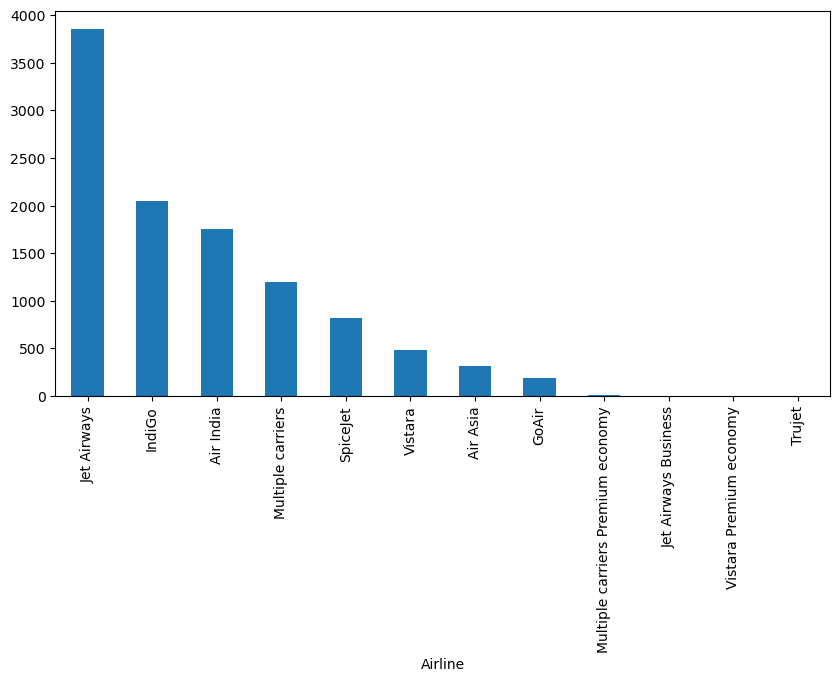

In [140]:
df2["Airline"].value_counts().plot(kind="bar"  , figsize=(10,5))

# which is the most popular destination 

<Axes: xlabel='Destination'>

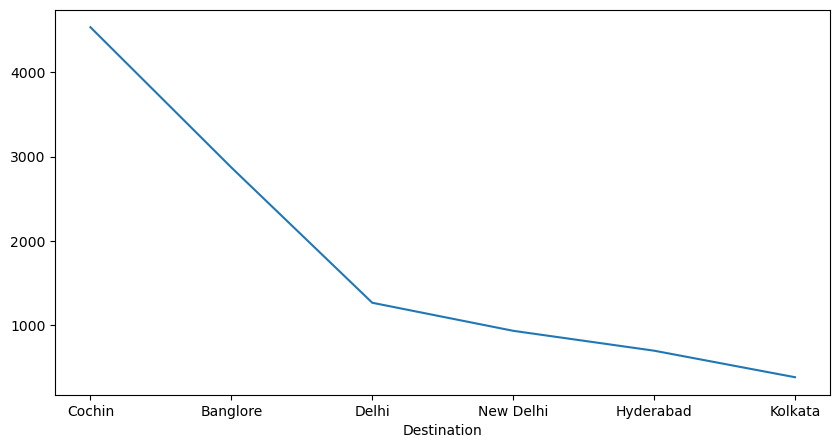

In [156]:
df2["Destination"].value_counts().plot(kind="line",stacked= True  , figsize=(10,5))

# which state is the popular to take flight

<Axes: xlabel='Source'>

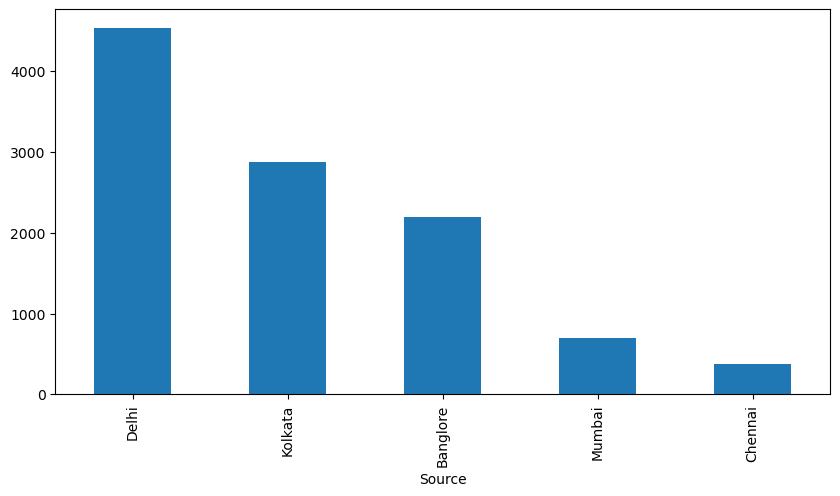

In [167]:
df2["Source"].value_counts().plot(kind="bar",stacked= True  , figsize=(10,5))

# Which month traveling through flight take place

In [181]:
import calendar
df2['month_name'] = df2['Month'].apply(lambda x: calendar.month_name[x])

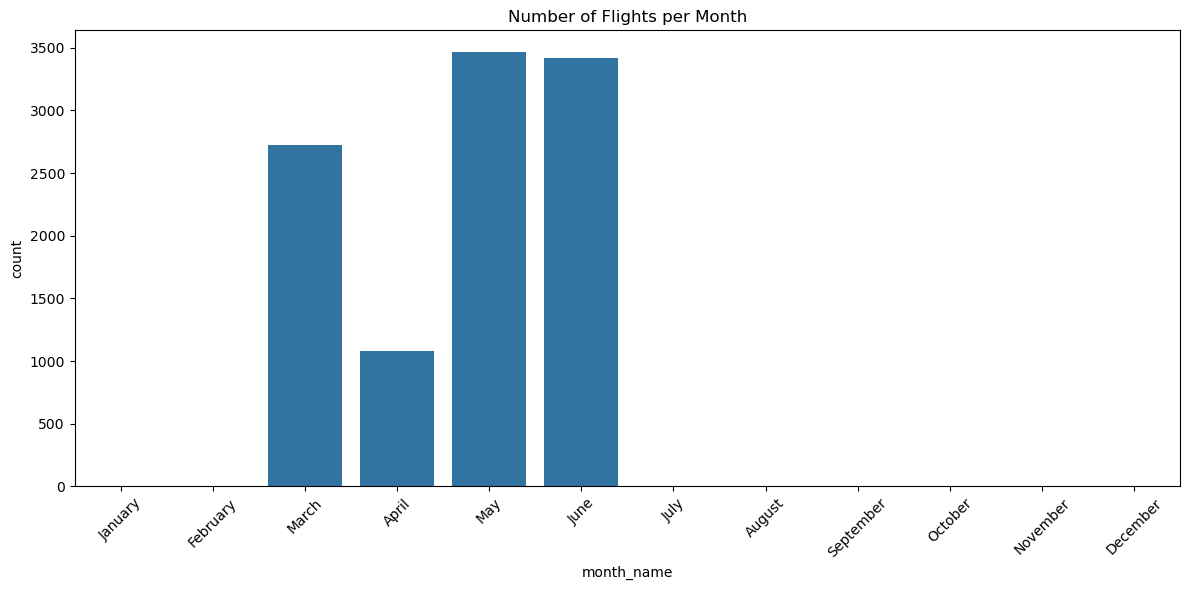

In [185]:
month_order = list(calendar.month_name)[1:]
plt.figure(figsize=(12,6))
sns.countplot(data=df2, x='month_name', order=month_order)
plt.title("Number of Flights per Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# How Many Stops does flights have 

<Axes: ylabel='count'>

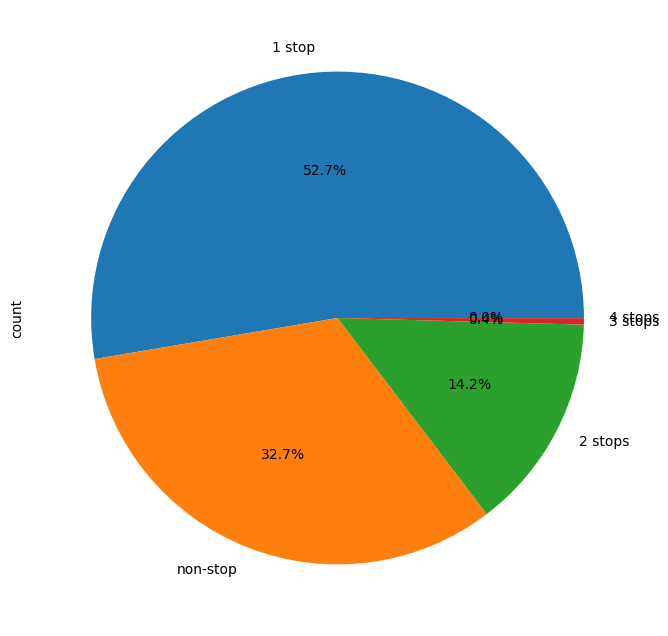

In [204]:
df2['Total_Stops'].value_counts().plot.pie(y=df2["Total_Stops"],figsize=(8,8),autopct='%1.1f%%',pctdistance=0.6)

# Highest Airline in Price

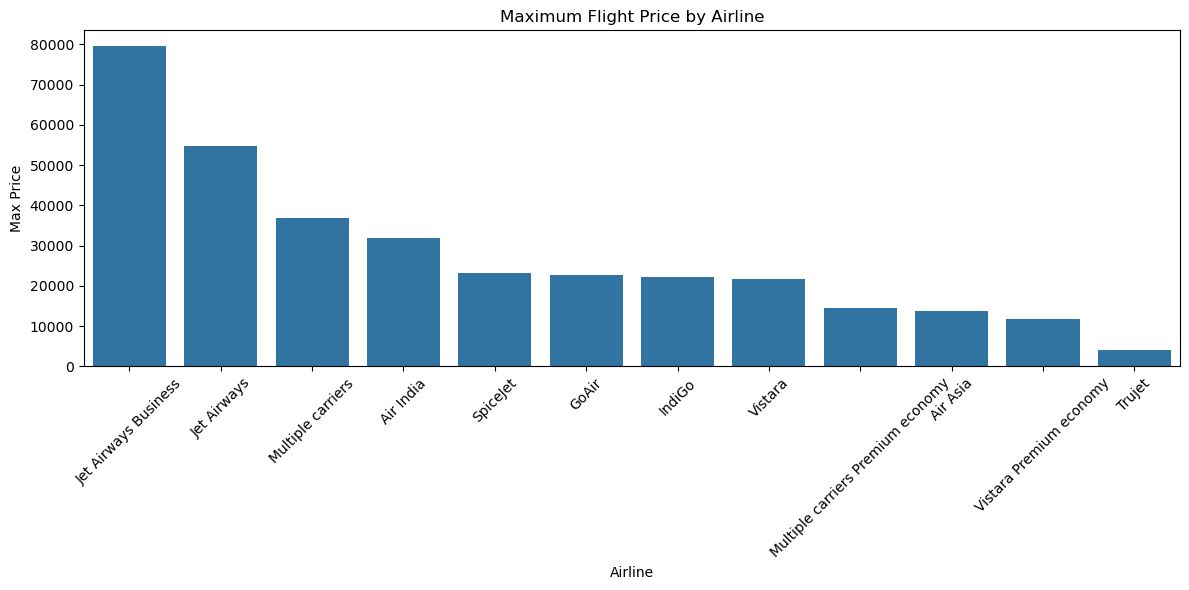

In [210]:
max_price_per_airline = df.groupby('Airline')['Price'].max().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=max_price_per_airline.index, y=max_price_per_airline.values)
plt.title("Maximum Flight Price by Airline")
plt.ylabel("Max Price")
plt.xlabel("Airline")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()